# Taking a Neural Network for a Quick Spin

Doing a good job on the MNIST dataset, with today's tools and techniques, is now basically the "Hello, world" of deep learning.  Back in the 1980s, solving this sort of problem, was real work, resulting in real commercial value.

_Unless you botch it during a class demo_, like I did before I wrote this cleaned up notebook, using very little Keras code, and very little strain, you should be able to obtain accuracies in the high 90% range.

The MNIST dataset:

- grayscale images, 28x28 pixels, with padded borders
- handwritten digits
- 60,000 training images plus 10,000 test images
- from NIST in the 1980s
    
Because the dataset has few classes, and the inputs are small, the characters are isolated and padded, and the inputs are generally well behaved (there are few illegible, ambiguous squiggles), the MNIST dataset is by contemporary standards a pretty easy computer vision problem.  Next in the course, we'll study newer and more sophisticated types of networks for taking on more challenging vision problems.

You should import this notebook into Jupyter and run through it on the VM, thinking through the cells.  Consider it a replacement for the modest mess I made in class.

## Getting the MNIST Dataset

Many of widely used research and competition databases are bundled with the major frameworks, which makes getting started easy.  The MNIST digits are one of these datasets, and we'll some of the other neural data dataset "greatest hits" as we move forward.

In [1]:
from tensorflow.keras.datasets import mnist

2023-07-28 17:19:31.735052: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-28 17:19:32.610434: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/compilers_and_libraries_2018.1.163/linux/tbb/lib/intel64_lin/gcc4.7:/opt/intel/compilers_and_libraries_2018.1.163/linux/compiler/lib/intel64_lin:/opt/intel/compilers_and_libraries_2018.1.163/linux/mkl/lib/intel64_lin::/usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64/
2023-07-28 17:19:32.610564: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not

## Investigate the Data

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape # a 3-axis "tensor", 60K samples, each is 28 by 28

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels # Note that are unsigned 8-bit ints; we need to mind our types sometimes

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

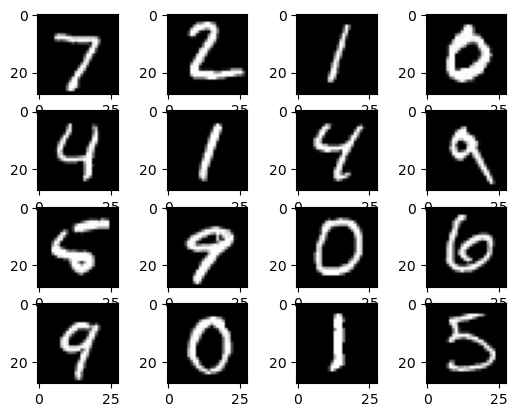

In [8]:
# See what these things look like
from matplotlib import pyplot

for i in range(16):
    pyplot.subplot(4, 4, i+1)  # WHAT IS THIS DOING?
    pyplot.imshow(test_images[i], 
                  cmap=pyplot.get_cmap('gray'))
pyplot.show()


## Constructing the Network

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
# There are a couple of types of Keras APIs: 
#    Sequential - simple list of layers, limited to single-input/single-output stacks
#    Functional - supports arbitrary model architectures, most widely used in practice
#    Model Sublcassing - you implement everything; used when you have exotic custom needs

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

2023-07-28 17:19:35.778742: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-28 17:19:36.597453: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14540 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0001:00:00.0, compute capability: 7.0


## Compiling the Model

Compiling the model configures it with various things it will need to train, including choosing an optimizer, choosing a loss function to optimize, and choosing a metric used to assess overall model performance.

In [11]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Reshaping the Data to Fit Our Network

In [12]:
# Our network expect to see a vector presented to it. Our training samples
# are actually rectangular.  We'll just flatten the matrices out.  We'll
# later see that this throws away valuable geometric information that networks
# containing more exotic types of layers can exploit.
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255    # Again mind the types, and normalize
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255      # Again mind the types, and normalize

## Fitting the Model, i.e. Training It

In [13]:
model.fit(train_images, train_labels,
          epochs=5, 
          batch_size=128)

Epoch 1/5


2023-07-28 17:19:38.070324: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fcd7000c180 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-28 17:19:38.070367: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Tesla V100-PCIE-16GB, Compute Capability 7.0
2023-07-28 17:19:38.076542: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-28 17:19:38.197839: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 [==============================] - 2s 2ms/step - loss: 0.2663 - accuracy: 0.9232
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1089 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0710 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0518 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0390 - accuracy: 0.9885


### Questions to Ask

- Why did the machine count to 469 during each epoch? Because we had 60,000 training samples and we processed them in batches of size 128.  We might stop and note how this batching helps the framework vectorize things.
    
- Look at the trend on the accuracy against the test set (our performance metric) as well as the way the loss decreases from epoch to epoch.  We'll later see nice ways to keep an eye on these things, make decisions about them, choose hyperparameters, etc.

## Predicting with the Model

In [18]:
test_digits = test_images[0:10] # Get first 10 test images

predictions = model.predict(test_digits)

predictions[0]  # If you haven't seen a softmax before, we'll explain this

1/1 [==============================] - 0s 19ms/step


array([7.4291924e-09, 1.1483646e-08, 8.9377399e-06, 3.3964252e-04,
       1.4963426e-11, 3.2345135e-08, 1.0039744e-11, 9.9965012e-01,
       7.0180124e-07, 6.3303247e-07], dtype=float32)

You might remember that in class we mentioned that a _softmax_ layer is like a layer where all of the units are sigmoid outputs, but where their output values are normalized so that the sum of all the outputs is 1.  That lets us view the softmax layer as a probability distribution.

In our current example the zeroth unit holds the probably that the input was 0, the 1-th unit holds the probability that the input was a 1, the 2-nd unit holds the probability that the input was 2, etc.

If you eyeball the above numbers and mind the exponents, you can probably spot quickly which guess the network is favoring for prediction number 0.  One of the values will be much larger than others, in a sense capturing the model's confidence in its guess.

In [19]:
predictions[0].argmax() # Which position in the 10 outputs for prediction zero has the biggest value?

7

In [16]:
test_labels[0] # What's the corresponding label in the test set?

7

See... done _properly_ we can get at least one answer right.  Now let's use Keras's `model.evaluate()` function to evaluate the model on the entire test set.

## Evaluate Model on New Data

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0719 - accuracy: 0.9780
test accuracy: 0.9779999852180481


You should end up with a high accuracy here, above 90%.  Step back and look at the network that we actually set up for the problem and note that it's actually not that big or complicated.

You might also note that when we flattened a $28\times 28$ input image into a 784 element vector we sort of threw away some potentially interesting geometric information, or at least mashed it into a form where certain things might be less simply expressed... e.g. which pixels are next to which pixels in the vertical direction.  You might also notice that these images are tiny, and that if they were bigger, say $1000\times 1000$, that we'd start needing really large layers with very large weight matrices and many parameters if we were using a fully connected network.  We'll also see a better approach using a new type of arithmetic operation in our layers that better respects spatial locality, movement of the target object in the image frame, and requires _vastly_ fewer parameters.